### MNIST dataset classification


In [1]:
import sys  
sys.path.insert(0, '../')


import HPO
import pysgpp
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.metrics
from sklearn.model_selection import KFold
import numpy as np
import keras
from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPooling2D, Conv2D
from scikeras.wrappers import KerasRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from numpy.random import seed
import random
import time

from tensorflow.keras import layers


random.seed(1)
seed(2)
tf.random.set_seed(3)

def reset_seeds():
    np.random.seed(1)
    random.seed(2)
    tf.random.set_seed(3)

VERBOSE = 1
CV = 2 #[(slice(None), slice(None))]

2023-06-22 22:43:51.530291: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-22 22:43:52.460815: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Hyperparameter space definition

In [2]:
hyperparameterspace = {
    #'epochs': ["interval-int", 1, 10],
    'batch_size': ["interval-int", 20, 2000],
    'learning_rate': ["interval-log", 1e-16, 1],
    #'number_conv_layers': ["interval-int", 1, 4],
    #'number_fc_layers': ["interval-int", 1, 4],
    #'kernel_size': ["interval-int", 1, 5],
    #'pool_size': ["interval-int", 1, 4],
    #'neurons_per_fc_layer': ["interval-int", 1, 10],
    #'dropout_prob': ["interval", 0, 1]
}

hyperparameterspace_special = {}
for key in hyperparameterspace.keys():
    liste = []
    for i in range(1, len(hyperparameterspace[key])):
        liste.append(hyperparameterspace[key][i])
    hyperparameterspace_special[key] = liste



### Model definition

In [3]:

num_classes = 10
input_shape = (28, 28, 1)


def create_model(learning_rate=1e-4):
    # create model
    model = Sequential()

    model.add(keras.Input(shape=input_shape))

    model.add(layers.Conv2D(32, kernel_size=(5, 5), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(32, kernel_size=(5, 5), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(num_classes, activation="softmax"))

    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return model


### Experiment parameters

In [4]:
DIRECTORY = "Current_tests/"+time.strftime("%H_%M_%S", time.localtime())

SPARSE_PARAMS = [2, 0.85, "gradient_descent"]

BUDGETS = [3, 7, 10, 16, 25, 30, 50]

### Optimization


################################################## Current Budget: 3 ##################################################

Performing grid search


2023-06-22 22:43:54.887085: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Best score with Grid search: -0.0860000029206276
With Hyperparameters: 
batch_size: 1010
learning_rate: 9.999999999999982e-09
Best score with Grid search: -0.0860000029206276

Performing random search
With Hyperparameters: 
batch_size: 1116
learning_rate: 1.0042226142084403e-16
Best score with Random search: -0.15240000188350677

Performing bayesian optimization
Iterations took 151.31790364100004 seconds
With Hyperparameters: 
batch_size: 1115.0
learning_rate: -15.560882286546896
Best score with Bayesian Optimization: -0.14219999313354492

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 50882ms.


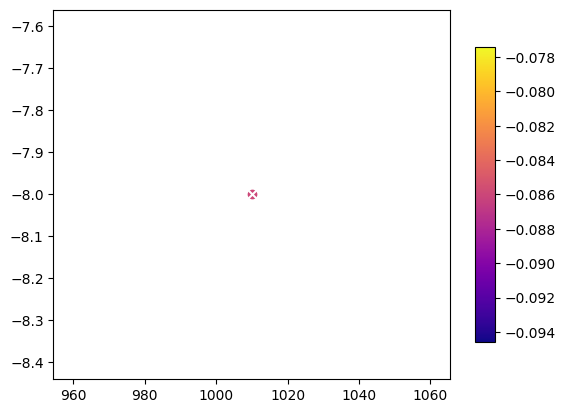

Solving linear system (automatic method)...
Done in 0ms.
Optimizing (gradient descent)...
Done in 0ms.
Optimizing (multi-start)...
Done in 1ms.
With Hyperparameters: 
batch_size: 0.5
learning_rate: 0.5
GRID SEARCH
{(1,0.0860000029206276)}
RANDOM SEARCH
{(3,0.15240000188350677)}
BAYESIAN SEARCH
{(3,0.14219999313354492)}
SPARSE SEARCH
{(3,0.0860000029206276)}

################################################## Current Budget: 7 ##################################################

Performing grid search
Best score with Grid search: -0.0892999991774559
With Hyperparameters: 
batch_size: 515
learning_rate: 4.6415888336127735e-06
Best score with Grid search: -0.0892999991774559

Performing random search
With Hyperparameters: 
batch_size: 1434
learning_rate: 0.0930304523985901
Best score with Random search: -0.9771999716758728

Performing bayesian optimization
Iterations took 994.8172192289999 seconds
With Hyperparameters: 
batch_size: 909.0
learning_rate: -2.965061461976573
Best score with Ba

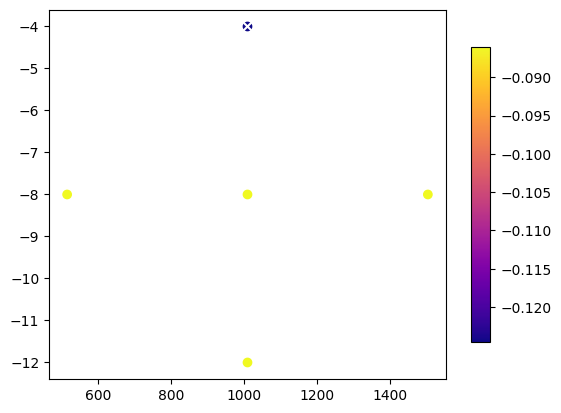

Solving linear system (automatic method)...
Done in 0ms.
Optimizing (gradient descent)...
Done in 0ms.
Optimizing (multi-start)...
Done in 2ms.
With Hyperparameters: 
batch_size: 0.5
learning_rate: 0.75
GRID SEARCH
{(1,0.0860000029206276)(4,0.0892999991774559)}
RANDOM SEARCH
{(3,0.15240000188350677)(7,0.9771999716758728)}
BAYESIAN SEARCH
{(3,0.14219999313354492)(7,0.6265000104904175)}
SPARSE SEARCH
{(3,0.0860000029206276)(7,0.12460000067949295)}

################################################## Current Budget: 10 ##################################################

Performing grid search
Best score with Grid search: -0.23899999260902405
With Hyperparameters: 
batch_size: 350
learning_rate: 9.999999999999991e-05
Best score with Grid search: -0.23899999260902405

Performing random search
With Hyperparameters: 
batch_size: 1434
learning_rate: 0.0930304523985901
Best score with Random search: -0.9771999716758728

Performing bayesian optimization


/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iterations took 1955.2334318250014 seconds
With Hyperparameters: 
batch_size: 600.0
learning_rate: -1.5806752400488477
Best score with Bayesian Optimization: -0.9740999937057495

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 564911ms.


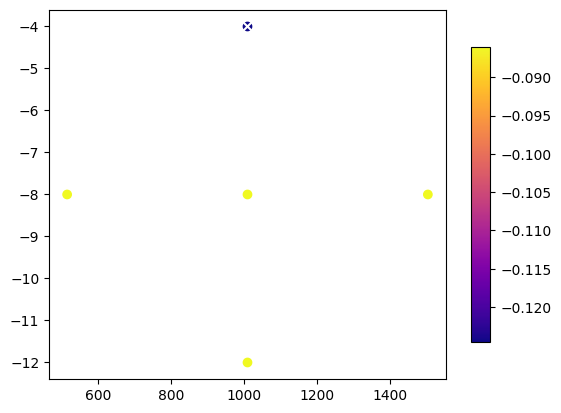

Solving linear system (automatic method)...
Done in 0ms.
Optimizing (gradient descent)...
Done in 0ms.
Optimizing (multi-start)...
Done in 0ms.
With Hyperparameters: 
batch_size: 0.5
learning_rate: 0.75
GRID SEARCH
{(1,0.0860000029206276)(4,0.0892999991774559)(9,0.23899999260902405)}
RANDOM SEARCH
{(3,0.15240000188350677)(7,0.9771999716758728)(10,0.9771999716758728)}
BAYESIAN SEARCH
{(3,0.14219999313354492)(7,0.6265000104904175)(10,0.9740999937057495)}
SPARSE SEARCH
{(3,0.0860000029206276)(7,0.12460000067949295)(7,0.12460000067949295)}

################################################## Current Budget: 16 ##################################################

Performing grid search
Best score with Grid search: -0.848800003528595
With Hyperparameters: 
batch_size: 267
learning_rate: 0.0006309573444801923
Best score with Grid search: -0.848800003528595

Performing random search
With Hyperparameters: 
batch_size: 1434
learning_rate: 0.0930304523985901
Best score with Random search: -0.977199

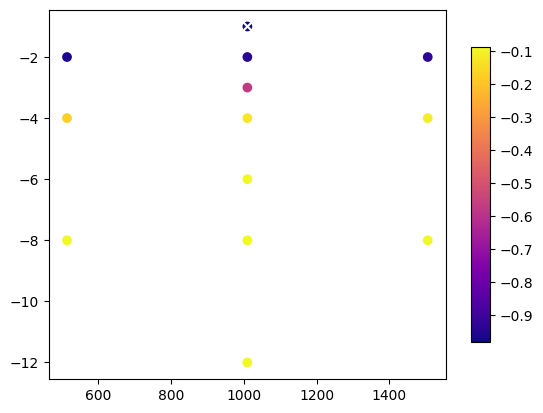

Solving linear system (automatic method)...
Done in 0ms.
Optimizing (gradient descent)...
Done in 0ms.
Optimizing (multi-start)...
Done in 20ms.
With Hyperparameters: 
batch_size: 0.5
learning_rate: 0.9375
GRID SEARCH
{(1,0.0860000029206276)(4,0.0892999991774559)(9,0.23899999260902405)(16,0.848800003528595)}
RANDOM SEARCH
{(3,0.15240000188350677)(7,0.9771999716758728)(10,0.9771999716758728)(16,0.9771999716758728)}
BAYESIAN SEARCH
{(3,0.14219999313354492)(7,0.6265000104904175)(10,0.9740999937057495)(16,0.9837999939918518)}
SPARSE SEARCH
{(3,0.0860000029206276)(7,0.12460000067949295)(7,0.12460000067949295)(15,0.9819999933242798)}

################################################## Current Budget: 25 ##################################################

Performing grid search
Best score with Grid search: -0.9429000020027161
With Hyperparameters: 
batch_size: 218
learning_rate: 0.0021544346900318825
Best score with Grid search: -0.9429000020027161

Performing random search
With Hyperparamete

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: 

Iterations took 4250.695017164999 seconds
With Hyperparameters: 
batch_size: 90.0
learning_rate: -0.5901335227321969
Best score with Bayesian Optimization: -0.9878000020980835

Performing sparse search
Adaptive grid generation (Ritter-Novak)...


: 

: 

In [5]:
################## MODEL AND FUNCTION DEFINITION ####################

def evaluate_model(batch_size, learning_rate, deterministic=True):
    
    if deterministic:
        reset_seeds()

    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

    # Scale images to the [0, 1] range
    x_train = x_train.astype("float32") / 255
    x_test = x_test.astype("float32") / 255

    # Make sure images have shape (28, 28, 1)
    x_train = np.expand_dims(x_train, -1)
    x_test = np.expand_dims(x_test, -1)

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    model = create_model(learning_rate)

    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

    model.fit(x_train, y_train, verbose=0, batch_size=batch_size, epochs=20, validation_split=0.1, shuffle=False, callbacks=[callback])

    score = model.evaluate(x_test, y_test, verbose=0)

    K.clear_session()
    del model 

    return -score[1]
    

def blackboxfunction_grid(params):

    batch_size = int(params[0])

    learning_rate = params[1]

    return evaluate_model(batch_size, learning_rate)

def blackboxfunction_random(params):
    
    batch_size = int(params[0])

    learning_rate = params[1]

    return evaluate_model(batch_size, learning_rate, deterministic=False)

def blackboxfunction_bayesian(params):
    
    batch_size = int(params[0])

    learning_rate = 10 ** params[1]

    return evaluate_model(batch_size, learning_rate, deterministic=False)

##################### Function for sparse grid search #####################

class ExampleFunction(pysgpp.ScalarFunction):

    def __init__(self):
        super(ExampleFunction, self).__init__(
            len(hyperparameterspace.keys()))

    def eval(self, x):
        
        batch_size = int(HPO.from_standard(
            hyperparameterspace_special["batch_size"][0], hyperparameterspace_special["batch_size"][1], x[0]))

        learning_rate = HPO.from_standard_log(
            hyperparameterspace_special["learning_rate"][0], hyperparameterspace_special["learning_rate"][1], x[1])

        return evaluate_model(batch_size, learning_rate)


RESULTS_GRID = "{"
RESULTS_RANDOM = "{"
RESULTS_BAYESIAN = "{"
RESULTS_SPARSE = "{"

dataset = HPO.Dataset([], [])

##### For each dataset: run models with different budget #####
for BUDGET in BUDGETS:

    print("\n################################################## Current Budget:",
            BUDGET, "##################################################")

    ############################## GRID SEARCH #######################

    print("\nPerforming grid search")
    optimization = HPO.GridSearchOptimization(
        dataset, blackboxfunction_grid, hyperparameterspace, budget=BUDGET, verbosity=VERBOSE, cv=CV)

    result, cost = optimization.fit()

    index_best = 0
    for m in range(len(result)):
        if result[m][1] < result[index_best][1]:
            index_best = m

    best_score = result[index_best][1]
    best_params = result[index_best][0]
    

    print("Best score with Grid search:", best_score)

    if VERBOSE > 0:
        print("With Hyperparameters: ")
        m = 0
        for key in hyperparameterspace.keys():
            if hyperparameterspace[key][0] == "list":
                index = int(
                    best_params[m]*(len(hyperparameterspace_special[key])-1))
                print(key + ": " +
                    str(hyperparameterspace_special[key][index]))
            else:
                print(key + ": " + str(best_params[m]))
            m += 1

    print("Best score with Grid search:", best_score)

    RESULTS_GRID += "(" + str(cost) + "," + str(-best_score) + ")"

    K.clear_session()

    # ########################### RANDOM SEARCH #######################
    print("\nPerforming random search")

    optimization = HPO.RandomSearchOptimization(
        dataset, blackboxfunction_random, hyperparameterspace, budget=BUDGET, verbosity=VERBOSE, cv=CV)

    result, cost = optimization.fit()

    index_best = 0
    for m in range(len(result)):
        if result[m][1] < result[index_best][1]:
            index_best = m

    best_score = result[index_best][1]
    best_params = result[index_best][0]
    
    if VERBOSE > 0:
        print("With Hyperparameters: ")
        m = 0
        for key in hyperparameterspace.keys():
            if hyperparameterspace[key][0] == "list":
                index = int(
                    best_params[m]*(len(hyperparameterspace_special[key])-1))
                print(key + ": " +
                      str(hyperparameterspace_special[key][index]))
            else:
                print(key + ": " + str(best_params[m]))
            m += 1

    print("Best score with Random search:", best_score)

    RESULTS_RANDOM += "(" + str(cost) + "," + str(-best_score) + ")"
    

    K.clear_session()

    ########################### BAYESIAN OPT #####################
    print("\nPerforming bayesian optimization")

    optimization = HPO.BayesianOptimization(
        dataset, blackboxfunction_bayesian, hyperparameterspace, budget=BUDGET, verbosity=VERBOSE)

    result, cost = optimization.fit()

    index_best = 0
    for m in range(len(result)):
        if result[m][1] < result[index_best][1]:
            index_best = m

    best_score = result[index_best][1]
    best_params = result[index_best][0]

    
    
    if VERBOSE > 0:
        print("With Hyperparameters: ")
        m = 0
        for key in hyperparameterspace.keys():
            if hyperparameterspace[key][0] == "list":
                index = int(
                    best_params[m]*(len(hyperparameterspace_special[key])-1))
                print(key + ": " +
                      str(hyperparameterspace_special[key][index]))
            else:
                print(key + ": " + str(best_params[m]))
            m += 1
    

    print("Best score with Bayesian Optimization:", best_score)


    RESULTS_BAYESIAN += "(" + str(BUDGET) + "," + str(-best_score) + ")"
    

    K.clear_session()

    ########################### SPARSE OPT ############################

    print("\nPerforming sparse search")

    f = ExampleFunction()

    optimization = HPO.SparseGridSearchOptimization(
        dataset, f, hyperparameterspace, budget=BUDGET, verbosity=VERBOSE, degree=SPARSE_PARAMS[0], adaptivity=SPARSE_PARAMS[1], optimizer=SPARSE_PARAMS[2])

    [X0, fX0, X1, fX1, X2, fX2], cost = optimization.fit()

    cost = cost + 2
    bestFX = fX0 
    bestX = X0
    if fX1 < bestFX:
        bestFX = fX1 
        bestX = X1 
    if fX2 < bestFX:
        bestFX = fX2
        bestX = X2

    RESULTS_SPARSE += "(" + str(cost) + "," + str(-bestFX) + ")"

    if VERBOSE > 0:
        print("With Hyperparameters: ")
        m = 0
        for key in hyperparameterspace.keys():
            if hyperparameterspace[key][0] == "list":
                index = int(
                    X0[m]*(len(hyperparameterspace_special[key])-1))
                print(key + ": " +
                      str(hyperparameterspace_special[key][index]))
            else:
                print(key + ": " + str(X0[m]))
            m += 1

    K.clear_session()

    print("GRID SEARCH")
    print(RESULTS_GRID+"}")

    print("RANDOM SEARCH")
    print(RESULTS_RANDOM+"}")

    print("BAYESIAN SEARCH")
    print(RESULTS_BAYESIAN+"}")

    print("SPARSE SEARCH")
    print(RESULTS_SPARSE+"}")


print("GRID SEARCH")
print(RESULTS_GRID+"}")

print("RANDOM SEARCH")
print(RESULTS_RANDOM+"}")

print("BAYESIAN SEARCH")
print(RESULTS_BAYESIAN+"}")

print("SPARSE SEARCH")
print(RESULTS_SPARSE+"}")


